In [8]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from matplotlib import dates as mdates    
from mpl_finance import candlestick_ohlc
#from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime
import requests 

In [12]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=003920&page=1'
html = BeautifulSoup(requests.get
    (url, headers={'User-agent': 'Mozilla/5.0'}).text, 'lxml')

with urlopen(url) as doc:
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=003920'  

for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(requests.get(page_url,
        headers={'User-agent': 'Mozilla/5.0'}).text)[0])
    
df = df.dropna()
print(df)

            날짜        종가     전일비        시가        고가        저가     거래량
1   2021.03.29  301000.0  3000.0  298000.0  301000.0  298000.0  1921.0
2   2021.03.26  298000.0   500.0  298500.0  298500.0  296000.0  1029.0
3   2021.03.25  298500.0  3000.0  300500.0  300500.0  296500.0  1802.0
4   2021.03.24  301500.0  1500.0  299000.0  302000.0  298500.0  1488.0
5   2021.03.23  300000.0   500.0  299500.0  302000.0  297500.0  3637.0
..         ...       ...     ...       ...       ...       ...     ...
9   1996.06.29   72900.0  2100.0   75000.0   75000.0   71500.0   850.0
10  1996.06.28   75000.0   100.0   75000.0   76000.0   75000.0  4870.0
11  1996.06.27   75100.0   600.0   74000.0   75100.0   74000.0  3160.0
12  1996.06.26   74500.0  2000.0   76500.0   76500.0   74500.0  1630.0
13  1996.06.25   76500.0     0.0   76000.0   76500.0   76000.0    70.0

[6220 rows x 7 columns]


In [19]:
df = df.iloc[0:1000]
print(df)

            날짜        종가      전일비        시가        고가        저가     거래량
1   2021.03.29  301000.0   3000.0  298000.0  301000.0  298000.0  1921.0
2   2021.03.26  298000.0    500.0  298500.0  298500.0  296000.0  1029.0
3   2021.03.25  298500.0   3000.0  300500.0  300500.0  296500.0  1802.0
4   2021.03.24  301500.0   1500.0  299000.0  302000.0  298500.0  1488.0
5   2021.03.23  300000.0    500.0  299500.0  302000.0  297500.0  3637.0
..         ...       ...      ...       ...       ...       ...     ...
9   2017.03.07  761000.0  30000.0  737000.0  765000.0  735000.0  1010.0
10  2017.03.06  731000.0  15000.0  738000.0  742000.0  730000.0  1197.0
11  2017.03.03  746000.0   8000.0  754000.0  783000.0  746000.0  1607.0
12  2017.03.02  754000.0  15000.0  774000.0  790000.0  754000.0  1926.0
13  2017.02.28  769000.0  24000.0  748000.0  774000.0  736000.0  1827.0

[1000 rows x 7 columns]


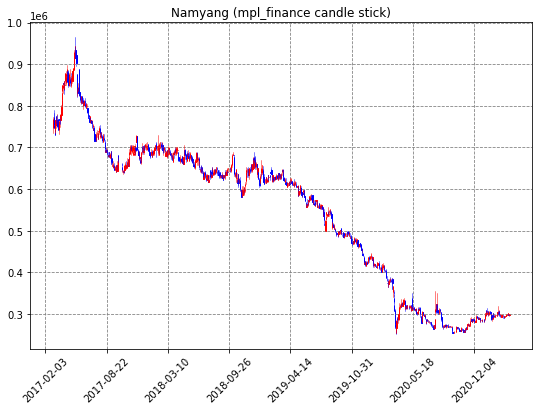

In [20]:
df = df.sort_values(by='날짜')
for idx in range(0, len(df)):
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date() 
    df['날짜'].values[idx] = mdates.date2num(dt)
ohlc = df[['날짜','시가','고가','저가','종가']]

plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)    
plt.title('Namyang (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue') 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

#### 급락한 기간 2017 03~ 2017 08